<a href="https://colab.research.google.com/github/Chohyungun/Chohyungun/blob/Dais/5%EC%9E%A5_%ED%9A%8C%EA%B7%80(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5.회귀

## 1.회귀 개요

- 회귀: 데이터값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계적 기법
<br>여러 독립변수 -> 1개의 종속변수
<br>이 때의 독립변수 개수가 1개: 단일회귀, 여러개: 다중 회귀

- 회귀계수(Regression coefficients): 독립변수가 한 단위 변화함에 따라 종속변수에 미치는 영향력 크기
- Regression coef가 선형일때 => 선형회귀, 비선형일 때 => 비선형회귀

- 선형 회귀 모델
1. 일반 선형 회귀 : 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제를 적용하지 않은 모델
2. 릿지(Ridge) : 선형 회귀에 L2 규제를 추가한 회귀 모델. 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델
3. 라쏘(Lasso) : 선형 회귀에 L1 규제를 적용한 방식. 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것 ( 피처 선택 기능 )
4. 엘라스틱넷(ElasticNet) : L2, L1 규제를 함께 결합한 모델. 주로 피처가 많은 데이터 세트에서 적용되고 L1 규제로 피처의 개수를 줄이고 L2 규제로 계수 값의 크기를 조정한다.
5. 로지스틱 회귀(Logistic Regression) : 강력한 분류 알고리즘. 일반적으로 이진 분류뿐만 아니라 희소 영역의 분류에서 뛰어난 예측 성능을 보인다. ex) 텍스트 분류


## 2.단순 선형회귀를 통한 회귀 이해

- 단순선형회귀: 독립변수 하나, 종속변수 하나인 선형회귀

- ŷ = w0 + w1*x
<br>다음과 같은 독립변수가 1개인 단순 선형 회귀에서는 기울기인 w1와 절편인 w0이 회귀 계수가 된다

- 잔차: 회귀 모델로 예측한 값 - 실제 값(최적의 회귀 모델을 만들기 위해서는 전체 데이터의 잔차 합이 최소가 되는 모델을 만들어야 함 => 최적 회귀 계수 찾기)

- 오류 값은 +,- 둘 다 될 수 있음 => 단순 더하기 하면 오류 값이 제대로 반영 안됨
- 따라서 오류 합을 계산할 때는 다음 방식을 따라야함
1. Mean Absolute Error: 절댓값을 취해서 더함
2. RSS: 오류값의 제곱을 구해서 더함 => 일반적으로 미분 계산의 편리성을 위해 선택(ERROR^2 = RSS)


- RSS: 일반적으로 회귀에서 비용(Cost)
- 비용함수(=손실함수,loss function): 회귀계수로 구성되는 RSS
- 머신러닝 회귀 알고리즘은 데이터를 계속 학습하며 이 비용함수가 반환하는 오류값을 지속해서 감소시키기고 수렴하는 최소 오류 값 구함

## 3.경사하강법

- 경사하강법: 비용 함수를 최소화하는 모델 매개변수 w에 대한 값을 찾는 방법


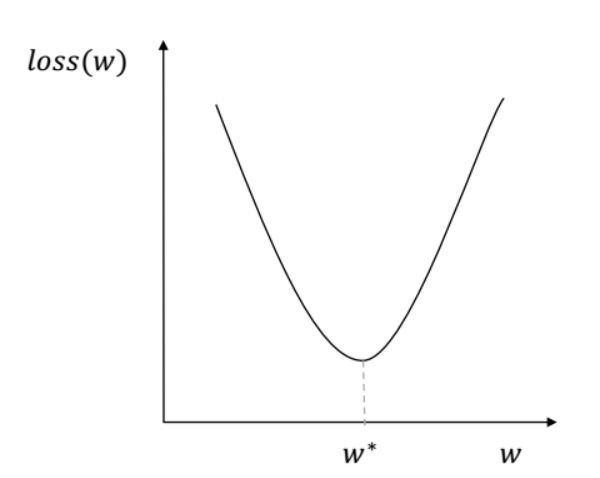
- 순서
1. 컴퓨터는 w*값을 모르기 때문에 무작위로 w 값을 초기값으로 선정함
2. 아래 식을 미분하여 기울기(+,-)값을 판단
3. 아래로 볼록일 경우 기울기가 +(양수)면 최적값 w*으로 가기 위해 왼쪽으로 가야하므로 에타(사람이 정해주는 파라미터)값에 음수값을 붙여줌
4. 아래로 볼록일 경우 기울기가 -(음수)면 최적값 w*으로 가기 위해 오른쪽으로 가야하므로 에타(사람이 정해주는 파라미터)값에 양수값을 붙여줌
5. 위 3,4 과정을 계속하여 w*값을 찾아냄

- 위 과정을 거치면 결국 시그마 안에 들어가는 형태는 모두 (실제값-예측값) 형태가 됨
- 학습률: 새로운 값을 이전값에서 -= 해줄 때, 편미분 값이 너무 클 수 있으므로 보정 계수 n을 곱해줌, 이때의 n

- tmi

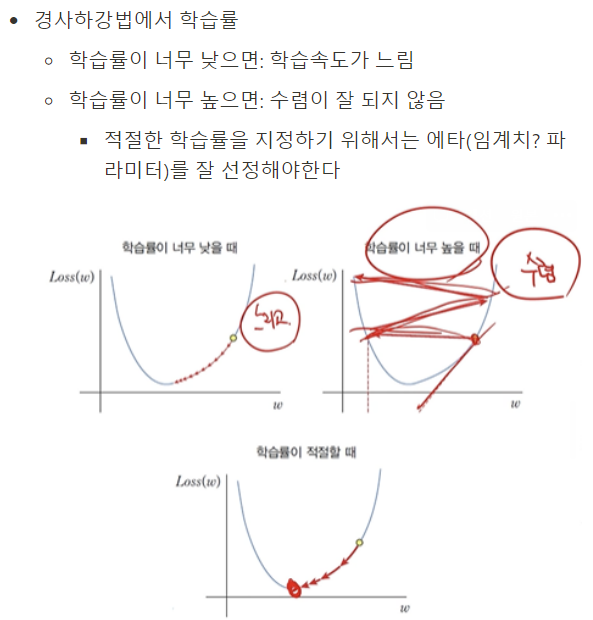

- 정리
1. w1, w0를 임의의 값으로 설정하고 첫 비용 함수의 값을 계산
2. w1, w0의 값을 위의 편미분 값으로 업데이트 해주고 다시 비용 함수의 값을 계산
3. 비용 함수의 값이 감소했으면 다시 2번 반복, 더 이상 비용 함수의 값이 감소하지 않으면 그때의 w1, w0를 구하고 반복을 중지

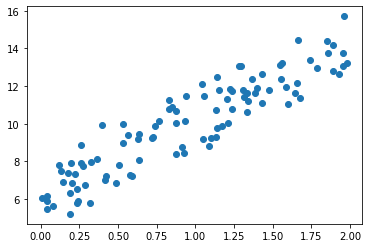

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6 식을 근사(w1=4, w0=6). random 값은 Noise를 위해 만듬
X = 2 * np.random.rand(100,1)
y = 6 +4 * X+np.random.randn(100,1)

# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X, y)

- 데이터는 y=4X+6을 기준으로 무작위로 퍼짐
- get_cost() 비용함수 정의
- 실제 y값과 예측된 y값을 인자로 받아서 RSS 계산

In [ ]:
# 비용 함수 정의하기 ( RSS )
# 1 / N 시그마 1부터 N 까지 (실제값 - 예측값) ^2
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N
    return cost

- 경사하강법을 gradient_descent()라는 함수를 생성해 구현
- gradient_desent() 순서 
1. w1과 w0를 모두 0으로 초기화, iter 개수만큼 반복하며 w1,w2 업뎃
2. w1과 w0을 업데이트

- get_weigth_updates에서 입력 배열 X값에 대한 예측 배열 y_pred는 np.dot(X,w1.T)+w0으로 구함
- 100개의 데이터 X(1,2,...,100)이 있다면 예측값은 w0+X(1)*w1+X(2)*w1....X(100)w1
- 이는 입력 배열 X와 w1 배열의 내적과 동일
- np의 dot()메서드를 통해 y_pred=np.dot(X,w1.T)+w0로 예측 배열 값 계산
- w1_update로 -2/n*learning rate*xi*예측 오류, w0_update로 -2/n*learning rate*예측 오류 사용=> 새로운 w1과 w0를 update함

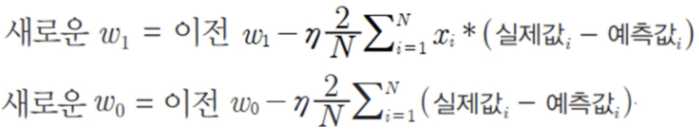

In [ ]:

# w1 과 w0 를 업데이트 할 w1_update, w0_update를 반환. 
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
         
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성 
    w0_factors = np.ones((N,1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))    
    
    return w1_update, w0_update

In [ ]:
# n*1행렬- n*n행렬 결과 확인
y[0]

array([9.22535819])

In [ ]:
np.dot(X,X.T)[0]

array([1.20478505, 1.57002233, 1.32321872, 1.196157  , 0.9300299 ,
       1.41790165, 0.96061508, 1.95766826, 2.11548454, 0.84175153,
       1.73803757, 1.1610587 , 1.2470021 , 2.03191974, 0.15594219,
       0.19127095, 0.04438452, 1.82781206, 1.70825173, 1.90989766,
       2.14831585, 1.75435605, 1.01306442, 1.71345981, 0.25964241,
       1.40478919, 0.31469688, 2.07378823, 1.14558962, 0.91028829,
       0.58076677, 1.69963962, 1.00136585, 1.24785691, 0.04124838,
       1.35586681, 1.34370559, 1.35432683, 2.07176676, 1.49676875,
       0.78921116, 0.95939615, 1.53147768, 0.13221021, 1.46372231,
       1.47222048, 0.46184316, 0.28302597, 0.69244535, 0.79843753,
       1.25172675, 0.96284173, 2.16973164, 0.22401428, 0.45853754,
       0.35411537, 1.43373867, 0.55603941, 1.0236706 , 0.53657626,
       0.34897862, 0.24230147, 1.44081017, 0.30334668, 0.43154822,
       0.80944541, 1.80228868, 0.21316197, 1.83950192, 0.21096042,
       2.14357656, 1.02880843, 2.1442387 , 1.32778956, 1.62287

In [ ]:
(y - np.dot(X,X.T))[0]

array([8.02057314, 7.65533586, 7.90213947, 8.0292012 , 8.29532829,
       7.80745655, 8.26474311, 7.26768993, 7.10987365, 8.38360666,
       7.48732062, 8.06429949, 7.97835609, 7.19343845, 9.069416  ,
       9.03408725, 9.18097367, 7.39754613, 7.51710646, 7.31546053,
       7.07704235, 7.47100214, 8.21229377, 7.51189838, 8.96571578,
       7.820569  , 8.91066131, 7.15156996, 8.07976857, 8.3150699 ,
       8.64459142, 7.52571857, 8.22399234, 7.97750128, 9.18410981,
       7.86949139, 7.8816526 , 7.87103136, 7.15359143, 7.72858944,
       8.43614703, 8.26596204, 7.69388051, 9.09314798, 7.76163588,
       7.75313771, 8.76351503, 8.94233222, 8.53291284, 8.42692066,
       7.97363144, 8.26251646, 7.05562655, 9.00134391, 8.76682065,
       8.87124282, 7.79161952, 8.66931878, 8.20168759, 8.68878193,
       8.87637957, 8.98305672, 7.78454802, 8.92201151, 8.79380997,
       8.41591278, 7.42306951, 9.01219623, 7.38585627, 9.01439777,
       7.08178163, 8.19654976, 7.08111949, 7.89756863, 7.60248

- get_weight_updates(): 경사하강방식 업데이트 수행 함수
- gradient_descent_steps: get_weight_updates() 반복 수행 함수

In [ ]:
# 경사 하강 방식으로 업데이트 반복적으로 수행
def gradient_descent_steps(X, y, iters = 10000):
    # w0과 w1를 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters만큼 반복적으로 get_weight_updates()를 호출해 업데이트
    for _ in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate = 0.01) # w0, w1이 1*1행렬이므로 1개의 값만 출력된다
        w1 -= w1_update
        w0 -= w0_update
        
    return w1, w0 

In [ ]:
# get_cost(): 예측값-실제값의 RSS 차이 계산 함수 
def get_cost(y, y_pred):
    N = len(y) 
    cost = np.sum(np.square(y - y_pred))/N
    return cost

# 경사하강법 예측 오류 계산
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


- 실제 선형식과 유사하게 w1: 4.022, w0: 6.162 도출
- 예측 오류 비용: 0.9935

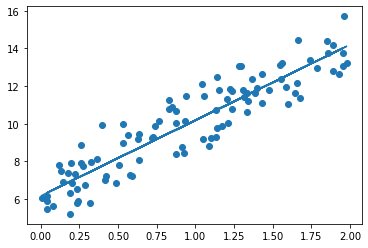

In [ ]:
# y_pred에 기반해 회귀선 그리기
plt.scatter(X, y)
plt.plot(X,y_pred)

- 일반적으로 경사 하강법은 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이팅 => 수행시간이 매우 오래걸림,확률적 경사하강법을 이용
- 확률적 경사하강법: 전체 입력 데이터로 w가 업데이트되는 값을 계산하는 것이 아니라 일부 데이터만 이용해 w가 업데이트되는 값을 계산
=> 경사 하강법에 비해 빠른 속도 보장

In [ ]:
# 확률적 경사 하강법 구현
# 기존 경사하강법에서 X,y데이터에서 batch_size만큼 데이터를 추출
# 이 데이터를 기반으로 w1,w0 update
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [ ]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


- 확률적 경사 하강법 결과는 기존 경사 하강법과 큰 차이가 없음
- 예측 오류 비용 또한 거의 동일
<br> => 큰 데이터 처리에서는 확률적 경사 하강법 이용하기

- Multi Linear Regression: 피처가 여러개인 경우 회귀 계수를 도출 방식, 하나의 수식이 행렬/벡터 개념으로 바뀜


- 피처가 M ( X1,X2....X100 ) 개일 경우에는 회귀 계수도 M + 1개로 도출 되고 Y = w0 + w1*X1 ...w100*X100으로 예측 회귀식을 만들 수 있다



- y_pred: 예측 회귀식에 의한 예측 행렬; 개별적으로 X의 개별 원소와 w1의 값을 곱하지 않고 데이터의 개수가 N이고 피처가 M개인 input 행렬 X_mat과 회귀 계수 w1,w2...w100을 배열로 표기한 W와의 행렬곱으로 구할 수 있음


- y_pred = np.dot(X, w1.T) + w0 -> np.dot(X_mat, W^T) + w0
- 이 때  w0을 W배열에 포함시키기 위해 X_mat의 맨 처음 열에 모든 데이터의 값이 1인 피처를 추가해주면 Yhat = X_mat * W^T로 도출됨

## 4.선형회귀를 이용한 보스턴 주택 가격 예측

In [ ]:
from sklearn.linear_model import LinearRegression
LinearRegression(fit_intercept=True, normalize=False,
					copy_X=True, positive=False)

LinearRegression(normalize=False)

- 파라미터 및 속성 설명

  - fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default : True)
  - normalize : 매개변수 무시 여부
  - copy_X : X의 복사 여부
  - n_jobs : 계산에 사용할 작업 수
  - coef_: fit()메서드 수행시 회귀 계수가 배열 형태로 저장(Target 값 개수, 피처 개수)
  - intercept_: intercept 값


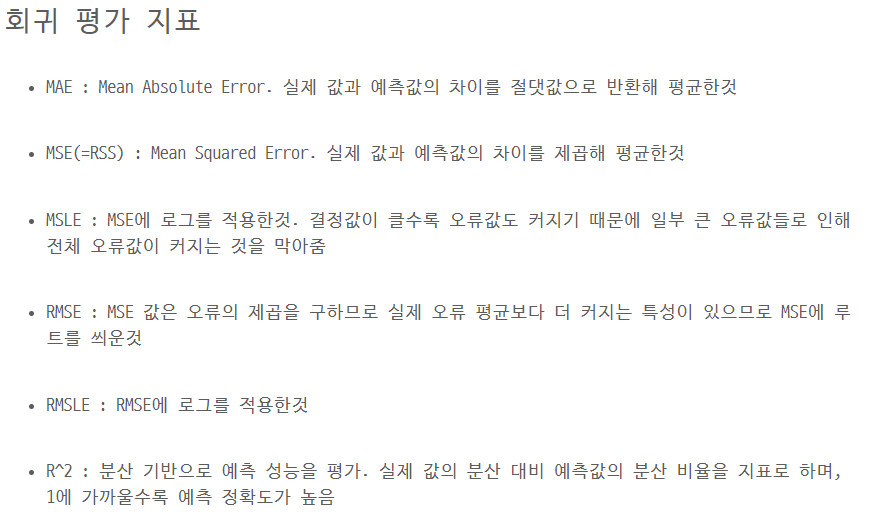

- 사이킷런은 RMSE를 제공하지 않음, RMSE를 구하기 위해 MSE에 제곱근을 씌워 계산하는 scoring() 함수 제작 필요
- scoring 함수에 적용 할 값
1. MAE: neg_mean_absolute_error
2. MSE: neg_mean_squrared_error
3. R^2: r2

- 사이킷런 Scoring함수에 회귀 평가 적용시 유의사항
  - 사이킷런의 scoring은 값이 클수록 좋은 평가 결과로 인식하기 때문에 지표값을 음수(negative)로 만들어 작은 오류값이 큰 숫자로 인식하게 해야 함
  - 실제 값과 예측값의 오류 차이를 기반으로 하는 회귀 평가 지표의 경우 값이 커지면 오히려 나쁜 모델이기 때문에 원래의 평가 지표에 -1을 곱해서 작은 오류 값이 더 큰 숫자로 인식


- 보스턴 주택 가격 회귀 구현

- CRIM: 지역별 범죄 발생률
- ZN: 25,000평방피트를 초과하는 거주 지역의 비율
- INDUS: 비상업 지역 넓이 비율
- CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
- NOX: 일산화질소 농도
- RM: 거주할 수 있는 방 개수
- AGE: 1940년 이전에 건축된 소유 주택의 비율
- DIS: 5개 주요 고용센터까지의 가중 거리
- RAD: 고속도로 접근 용이도
- TAX: 10,000달러당 재산세율
- PTRATIO: 지역의 교사와 학생 수 비율
- B: 지역의 흑인 거주 비율
- LSTAT: 하위 계층의 비율
- MEDV: 본인 소유의 주택 가격(중앙값)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# 사이킷런에서 boston 데이터 호출, boston_data 객체로 저장
boston = load_boston()

# boston 데이터셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이터셋 크기 :',bostonDF.shape)
bostonDF.head()

Boston 데이터셋 크기 : (506, 14)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- 집값과 관련이 있을 법한 13개의 변수를 input하여 Y값을 예측해야함
- Instance(행,열)이 506개; sample이 506개 있다



In [ ]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


- 데이터 세트의 피쳐값은 전부 Not NULL

- seaborn의 regplot(): X,Y 축 값의 산점도와 함께 선형 회귀 직선 도식화
- matplotlib의 subplots(): 다중 그래프 시각화, 각 ax마다 칼럼과 PRICE의 관계 표현
- ncols = 4, nrows=2로 지정

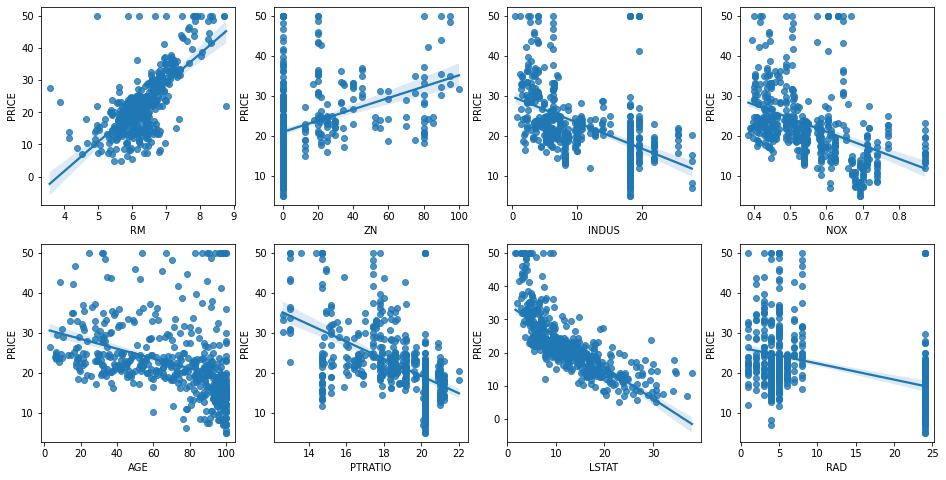

In [ ]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])

- 다른 칼럼보다도 RM과 LSTAT의 PRICE 영향도가 크게 나타남을 알 수 있음
1. RM: 양 방향 선형성 가장 큼
2. LSTAT: 음 방향 선형성 가장 큼(적을수록 PRICE 증가)

- LinearRegression 클래스를 이용해 보스턴 주택 가결 회귀 모델 생성
- train_test_split()으로 학습,테스트 데이터 세트 분리 및 학습/예측
- metrics 모듈의 mean_squared_error()와 r2_score() 함수를 이용해 MSE, R2 성과 측정

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


- 절편값은 intercept 속성에
- 회귀계수는 coef 속성에 저장

In [ ]:
# LinearRegression으로 생성한 주택가격 모델의 절편과 회귀 계수
print('절편 값 : ', lr.intercept_)
print('회귀 계수값 :', np.round(lr.coef_, 1))

절편 값 :  40.995595172164755
회귀 계수값 : [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


- coef 속성은 회귀 계수 값만 가지고 있음, 이를 피쳐별 회귀 계수 값으로 다시 매핑, 높은 값순서대로 출력
- sort_values(): False시 값 오름차순 정렬

In [ ]:
# coef_ 속성이 회귀 계수 값만 가지고 있기 때문에 회귀 계수 값으로 다시 매핑
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 컬럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

- RM이 양의 값으로 회귀 계수가 가장 크며, NOX피처의 회귀 계수는 - 값이 너무 커보임

- cross_val_score()를 이용해 교차검증을 통해 MSE, RMSE 측정
- RMSE는 MSE수치 결과 변환을 통해 도출 => sqrt(-1*MSE)
- MSE는 값이 낮을수록 좋은 회귀모델(오류가 줄어드는 것이므로)

In [ ]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
# neg_mse_scores은 음수값이 반환
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 


- 5개 폴드 세트에 대해 avgRMSE는 약 5.829임
- 교차검증으로 반환된 neg_mean_squared_error 값을 확인하면 모두 음수임

## 5.다항 회귀와 과적합/과소적합 이해

### 다항회귀 이해

- 다항회귀: 회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것을 다항 회귀라고 한다
- 단 다항 회귀는 선형 회귀이다
  - 선형/비선형을 나누는 것은 회귀 계수가 선형 / 비선형 인지에 따른 것, 독립변수의 선형 / 비선형이랑은 무관함 (선형/비선형은 w값에 의존, 다항/단항은 x값)


- 사이킷런은 다항 회귀를 위한 클래스를 제공하지 않음 => 비선형 함수를 선형 모델에 적용시켜 다항 함수 구현 필요
- PolynominalFeatures 클래스를 통해 피처를 Polynomial 피처로 변환
- PolynominalFeatrues: 입력받은 단항식 피처를 degree에 해당하는 다항식 피처로 변환
  - ex) x1, x2 -> 1, x1, x2, x1^2, x1x2, x2^2

In [ ]:
# PolynominalFeatures를 이용하여 단항값을 2차 다항값으로 변환
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처 \n', X)

# degree = 2 인 2차 다항식으로 변환
poly = PolynomialFeatures(degree = 2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처 : \n', poly_ftr)

일차 단항식 계수 피처 
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처 : 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


- 3차 다항 회귀 함수를 임의로 설정한다

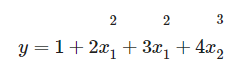

- 위 회귀함수의 회귀계수를 예측하기 위해 polunominal_func()를 만들어 3차 다항 계수 피처값이 입력되면 결정 값을 반환하게 한다

In [ ]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처 \n', X)

y = polynomial_func(X)
print('삼차 다항식 결정값 : \n', y)

일차 단항식 계수 피처 
 [[0 1]
 [2 3]]
삼차 다항식 결정값 : 
 [  5 125]


- 3차 다항식이 다음과 같이 변환됨
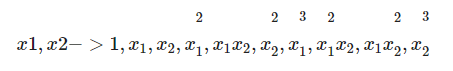

- 일차 단항식 계수를 3차 다항식 계수로 변환하고, 이를 선형 회귀에 적용하면 다항 회귀로 구현
- PolynomialFeatures(degress=3)으로 단항계수 피처를 3차 다항 계수로 변환

In [ ]:
from sklearn.linear_model import LinearRegression

# 3차 다항식변환
poly_ftr = PolynomialFeatures(degree = 3).fit_transform(X) # 단항 계수 피처 -> 3차 다항계수로
print('3차 다항식 계수 feature : \n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀계수 \n', np.round(model.coef_, 2)) # 원래 다항식에 근사하고 있다
print('Polynomial 회귀 Shape', model.coef_.shape) 

3차 다항식 계수 feature : 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape (10,)


- 일차 단항식 계수 피처는 2개, 3차 다항식 Polynomial 변환 후 다항식 계수 피처 10개
- 이 데이터 세트에 선형회귀를 적용하면 회귀계수가 10개로 늘어남
- 원래 다항식과는 차이가 있지만 근사하므로 괜찮음

- 하지만 이렇게 피처 변환과 선형 회귀 적용을 별도로 하는 것 보다 사이킷런의 Pipeline객체를 이용해 한 번에 다항 회귀를 하는 것이 코드가 더 명료
- Pipeline
1. 전처리를 위한 변환기; 연속적으로 변환 단계 수행
2. 입력값으로 [이름,추정치]
3. 지막 단계에는 변환기와 추정기를 모두 사용할 수 있고 그 외에는 모두 변환기여야 함

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree = 3)), ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)

print('Polynomial 회귀 계수 \n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 다항회귀를 이용한 과소적합 및 과적합 이해



- 다항 회귀는 피처의 직선적 관계가 아닌 복잡한 다항 관계를 모델링할 수 있다.
- 차수가 높아질수록 더 복잡한 피처 간의 관계까지 모델링이 가능하지만, 다항 회귀의 차수를 높일수록 학습 데이터에만 너무 맞춘 학습이 이뤄져서 정작 테스트 데이터 환경에서는 오히려 예측 정확도가 떨어진다. => 과적합 문제발생

In [ ]:
# 과적합, 과소적합 예제
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# random 값으로 구성된 X값에 대해 Cosine 변환값을 반환. 
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0 부터 1까지 30개의 random 값을 순서대로 sampling 한 데이타 입니다.  
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 cosine 기반의 true_fun() 에서 약간의 Noise 변동값을 더한 값입니다. 
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03899000e+05 -1.87415100e+06  2.03715130e+07
 -1.44872551e+08  7.09311979e+08 -2.47064676e+09  6.24558367e+09
 -1.15676035e+10  1.56894317e+10 -1.54005437e+10  1.06456871e+10
 -4.91375763e+09  1.35919168e+09 -1.70380199e+08] 입니다.
Degree 15 MSE 는 180526263.32 입니다.


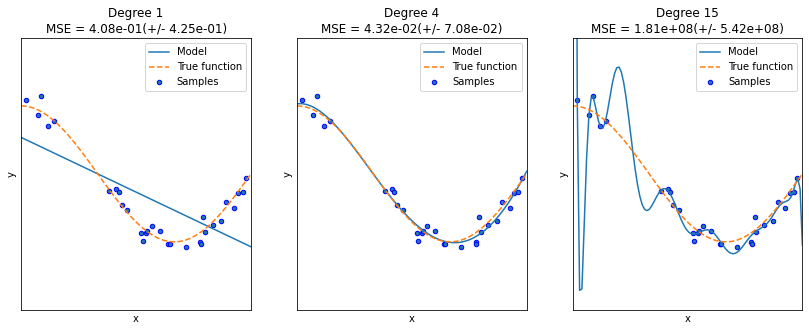

In [ ]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다. 
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환합니다. 
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가합니다. 
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다. 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.  
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

- 위의 실선으로 표현된 예측 곡선이 다항 회귀 곡선이다. 점선은 실제 데이터 세트 X, Y의 코사인 곡선이다.

  - Degree 1 : 단순한 직선으로서 학습 데ㅣ터의 패턴을 제대로 반영하지 못한다. ( 과소적합 )
  - Degree 4 : 실제 데이터 세트와 유사하다. MSE값도 가장 낮은 것을 확인할 수 있다.
  - Degree 15 : MSE 값이 말도 안되게 큰 수치를 기록, 변동 잡음까지 지나치게 반영하여 테스트 값의 실제 곡선과는 완전히 다른 곡선이 만들어졌다. ( 과적합 )

### 편향-분산 트레이드오프(Bias-Variance Trade off)

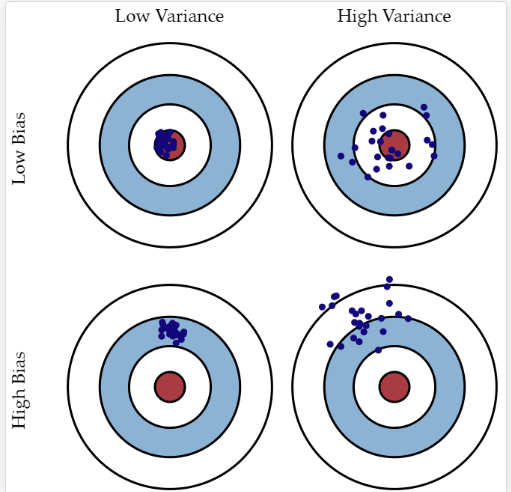

- 편향: 지나치게 단순한 모델로 인한 error
- 편향이 크면 과소 적합(under-fitting)을 야기, 모델에 편향이 크다는 것은 그 모델이 뭔가 중요한 요소를 놓치고 있다는 뜻


- 분산: 분산은 지나치게 복잡한 모델로 인한 error
- 분산이 크면 과대 적합(Over-fitting)을 야기, 분산이 큰 모델은 훈련 데이터에 지나치게 적합을 시켜 일반화가 되지 않은 모델

- 위의 예시에서 Degree 1인 경우에는 지나치게 한 방향으로 치우친 고편향(High Bias) 모델
- Degree 15의 경우 지나치게 높은 변동성을 가지는 고분산(High Variance) 모델로 볼 수 있다.
- 편향과 분산은 한 쪽이 높으면 한 쪽이 낮아지는 경향이 있음
- 높은 편향 / 낮은 분산에서 과소적합되기 쉬우며 낮은 편향 / 높은 분산에서 과적합 되기가 쉽다 => 편향과 분산이 서로 트레이드 오프를 이루면서 오류 Cost가 최소가 되는 모델을 구축하는 것이 가장 효율적인 머신러닝 예측 모델을 만드는 방법